In [1]:
import numpy as np
from apprenticheshiplearning.utils.gridworld import plot_gridworld, plot_cost_function, plot_occupation, sanity_check, plot_policy
from apprenticheshiplearning.problems.gridworld import GridWorld
from apprenticheshiplearning.classes.solver import SolverMdp, SolverSMD

In [2]:
np.random.seed(1234456)

### Setting

In [3]:
# Parameters
n = 10
wind_intensity = 0.2 # between 0 and 1
gamma = 0.7

In [4]:
grid = np.zeros((n, n))
goal = [                    
        [i for  i in range(0,int(n/1.2))], 
        [n-1]
        ]
obstacles = [
                [i for  i in range(0,int(n/1.2))],
                [int(n/2)]
                
            ]
actions = ["up", "down", "left", "right"]
init_dist = np.ones((n,n))/(n**2)

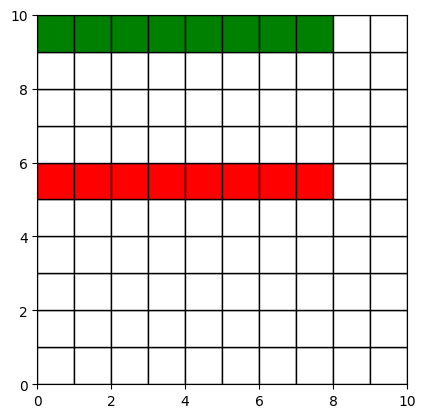

In [5]:
plot_gridworld(grid, obstacles, goal)

In [6]:
def transitions(s1, s , a, goal, n, wind_intensity): #go from s to s1 with action a
    if a == "up":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] != 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] < n - 1:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] + 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] + 1:
                return wind_intensity
            else:
                return 0
            
    if a == "down":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] != 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0
        elif s[0] == 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0 and s[1] > 0:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1] - 1:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 1 and s1[1] == s[1] - 1:
                return wind_intensity
            else:
                return 0

    if a == "left":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == 1:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] - 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] - 2 and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

    if a == "right":
        if s[0] in goal[0] and s[1] in goal[1]:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] == n - 1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] + 1 and s1[1] == s[1]:
                return 1 - wind_intensity
            elif s1[0] == s[0] and s1[1] == s[1]:
                return wind_intensity
            else:
                return 0

def cost(s, a, goal, obstacles):
    r = 0
    if s[0] in obstacles[0] and s[1] in obstacles[1]:
        r = 1
    elif s[0] in goal[0] and s[1] in goal[1]:
        r = -1
    return r

In [7]:
gridworld = GridWorld(grid, obstacles, goal, wind_intensity, actions, init_dist, gamma)
gridworld.get_mdp_forward()

### Forward 

##### Optimal

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Apr 09 07:07:25 AM: Your problem has 400 variables, 500 constraints, and 0 parameters.
(CVXPY) Apr 09 07:07:25 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 09 07:07:25 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 09 07:07:25 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 09 07:07:25 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 09 07:07:25 AM: Compiling problem (target solver=CLARABEL

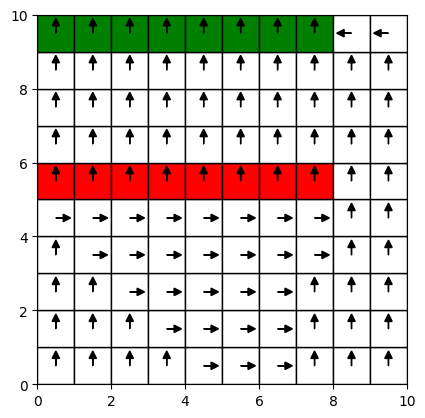

In [8]:
gridworld = GridWorld(grid, obstacles, goal, wind_intensity, actions, init_dist, gamma)
gridworld.get_mdp_forward()
gridworld.mdp_forward.build_T()
solver_expert = SolverMdp(gridworld.mdp_forward)
prob, mu_e = solver_expert.solve()

policy_e = gridworld.mdp_forward.get_policy_from_mu(mu_e.value)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

##### Suboptimal

In [9]:
gridworld = GridWorld(grid, obstacles, goal, wind_intensity, actions, init_dist, gamma)
gridworld.get_mdp_forward()
gridworld.mdp_forward.build_T()
solver_expert = SolverMdp(gridworld.mdp_forward)
prob, mu_e = solver_expert.solve(iters=2)

                                     CVXPY                                     
                                     v1.5.3                                    
(CVXPY) Apr 09 07:07:25 AM: Your problem has 400 variables, 500 constraints, and 0 parameters.
(CVXPY) Apr 09 07:07:25 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 09 07:07:25 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 09 07:07:25 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Apr 09 07:07:25 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Apr 09 07:07:25 AM: Compiling problem (target solver=CLARABEL

c:\Users\esteb\OneDrive - Universidad de los andes\Documentos\ANDES\Noveno Semestre\Thesis\apprenticeshiplearning\venv\lib\site-packages\cvxpy\problems\problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


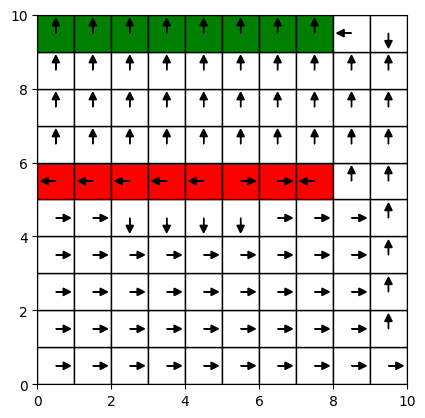

In [10]:
policy_e = gridworld.mdp_forward.get_policy_from_mu(mu_e.value)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

In [11]:
mu_expert = mu_e.value

In [12]:
mu_expert = np.maximum(mu_expert, 0)
mu_expert = mu_expert/np.sum(mu_expert)

### SMD

In [13]:
c_hat = np.zeros(n**2 * len(actions))
for i in range(len(goal[0])):
    for j in range(len(goal[1])):
        for a in range(len(actions)):
            if np.random.uniform() < 0.5:
                s = gridworld.grid_to_S[goal[0][i], goal[1][j]]
                c_hat[gridworld.get_indexing(s, a)] = -1

for i in range(len(obstacles[0])):
    for j in range(len(obstacles[1])):
        for a in range(len(actions)):
            if np.random.uniform() < 0.5:
                s = gridworld.grid_to_S[obstacles[0][i], obstacles[1][j]]
                c_hat[gridworld.get_indexing(s, a)] = 1       

In [14]:
alpha = 0.1
mu_e = mu_expert
c_0 = np.zeros(n**2 * len(actions))
u_0 = np.zeros(n**2)
mu_0 = np.ones(n**2 * len(actions)) / (n**2 * len(actions))
T = 100000
N = 20

In [78]:
solver_smd = SolverSMD(gridworld, c_hat, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T)
c, u, mu = solver_smd.solve_expected(N, graphics=True)

Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20


In [79]:
mu_e @ gridworld.mdp_forward.c, mu @ gridworld.mdp_forward.c, mu @ c, mu_e @ c

(np.float64(-0.3120940469765851),
 np.float64(0.043999837897822),
 np.float64(0.010725871770838913),
 np.float64(-0.2037209486936409))

In [80]:
c_true = np.zeros((n, n, len(actions)))
for i in range(len(gridworld.mdp_forward.c)):
    c_true[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = gridworld.mdp_forward.c[i]


UP


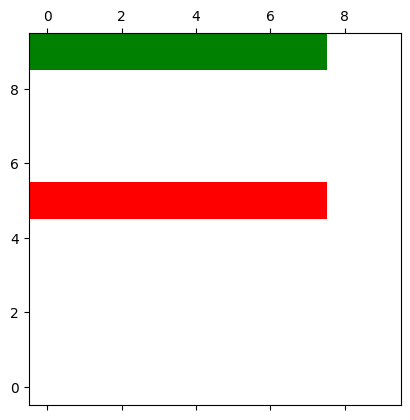

DOWN


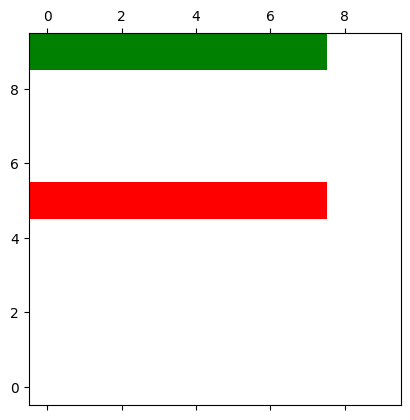

LEFT


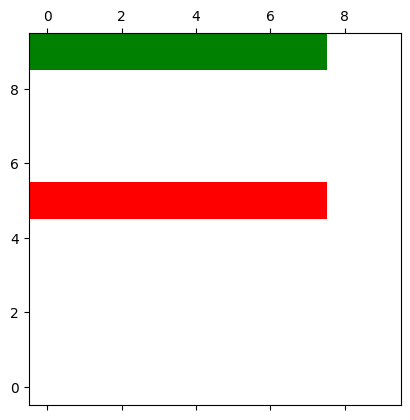

RIGHT


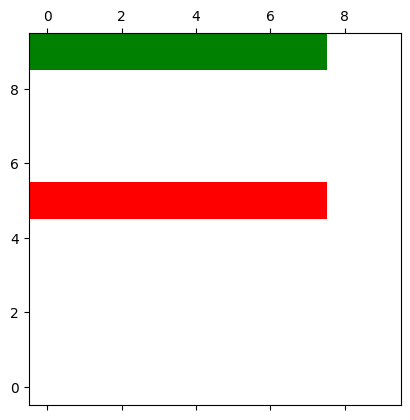

In [81]:
print("UP")
plot_cost_function(c_true[:, :, 0])
print("DOWN")
plot_cost_function(c_true[:, :, 1])
print("LEFT")
plot_cost_function(c_true[:, :, 2])
print("RIGHT")
plot_cost_function(c_true[:, :, 3])

In [82]:
c_reconstructed = np.zeros((n, n, len(actions)))
for i in range(len(c)):    
    c_reconstructed[gridworld.S_to_grid[i % n**2][0], 
                    gridworld.S_to_grid[i % n**2][1], 
                    int(i / n**2)
                    ] = c[i]

UP


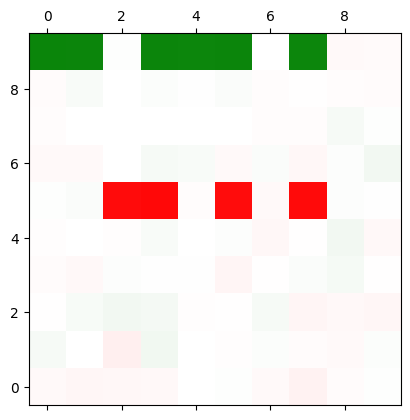

DOWN


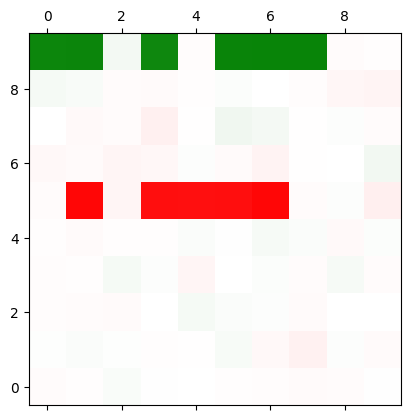

LEFT


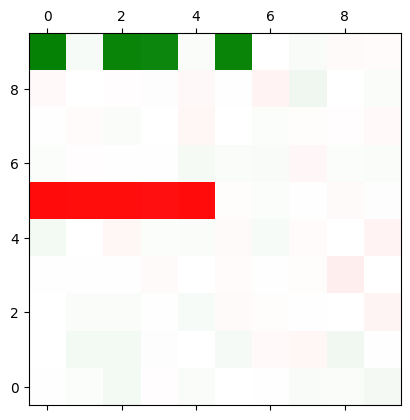

RIGHT


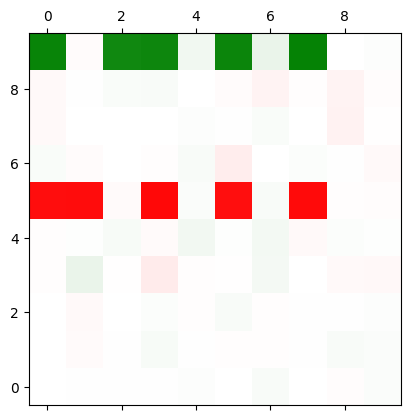

In [83]:
print("UP")
plot_cost_function(c_reconstructed[:, :, 0])
print("DOWN")
plot_cost_function(c_reconstructed[:, :, 1])
print("LEFT")
plot_cost_function(c_reconstructed[:, :, 2])
print("RIGHT")
plot_cost_function(c_reconstructed[:, :, 3])

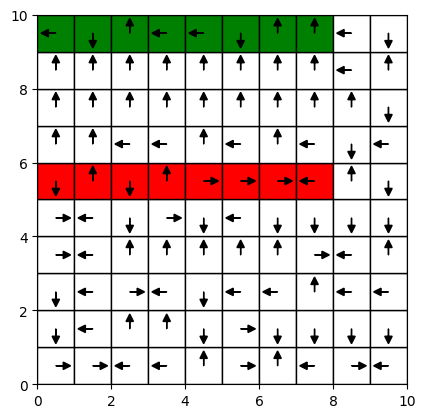

In [86]:
policy_e = gridworld.mdp_forward.get_policy_from_mu(mu)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

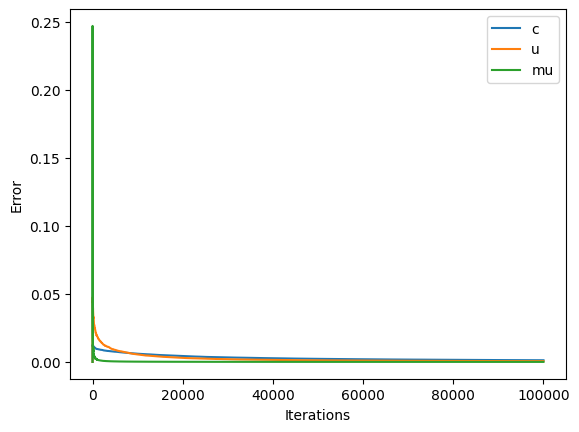

In [42]:
# plot the following list against its axis
import matplotlib.pyplot as plt
plt.plot(solver_smd.c_iter)
plt.plot(solver_smd.u_iter)
plt.plot(solver_smd.mu_iter)
#add labels
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['c', 'u', 'mu'])
plt.show()


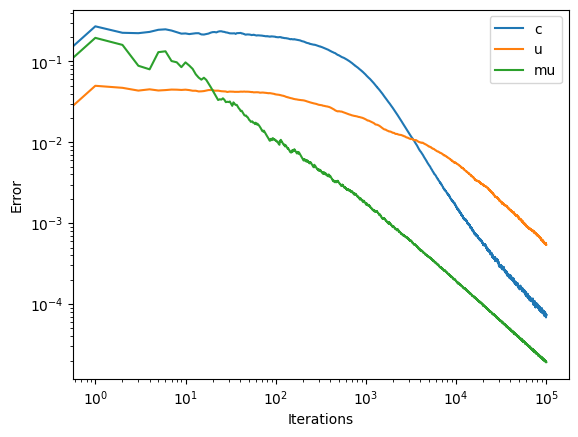

In [75]:
plt.plot(solver_smd.c_iter)
plt.plot(solver_smd.u_iter)
plt.plot(solver_smd.mu_iter)
plt.xscale('log')
plt.yscale('log')
#add labels
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['c', 'u', 'mu'])
plt.show()

#### Duality gap

Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20


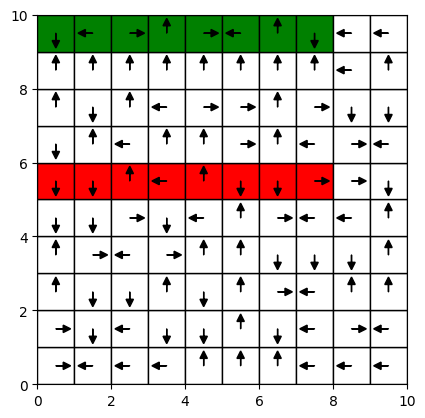

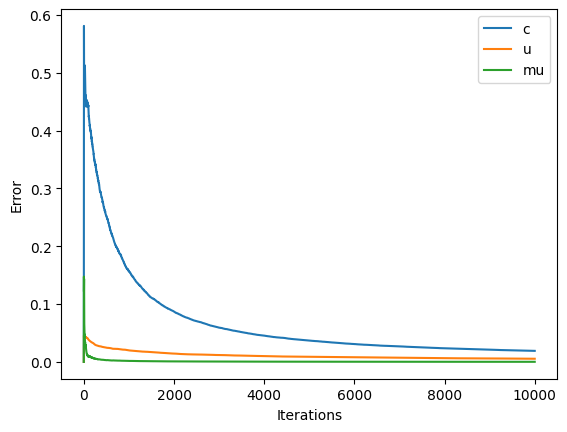

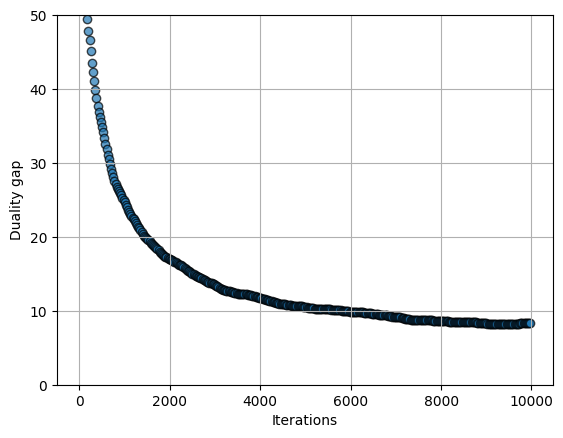

In [15]:
import matplotlib.pyplot as plt

alpha = 0.25
T = 10000

solver_smd = SolverSMD(gridworld, c_hat, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T)
c, u, mu = solver_smd.solve_expected(N, graphics=True, graphics_gap=True)

policy_e = gridworld.mdp_forward.get_policy_from_mu(mu)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

plt.plot(solver_smd.c_iter)
plt.plot(solver_smd.u_iter)
plt.plot(solver_smd.mu_iter)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['c', 'u', 'mu'])
plt.show()

plt.scatter(solver_smd.gaps_index, solver_smd.gaps, alpha=0.7, edgecolor='k')
plt.ylim((0, 50))
plt.xlabel('Iterations')
plt.ylabel('Duality gap')
plt.grid()
plt.show()

Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20


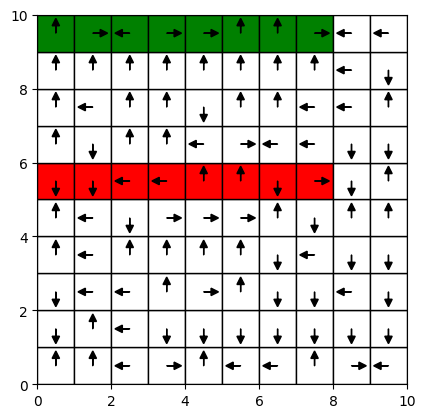

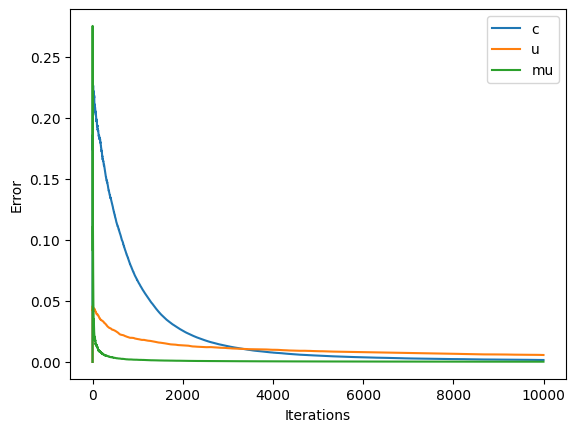

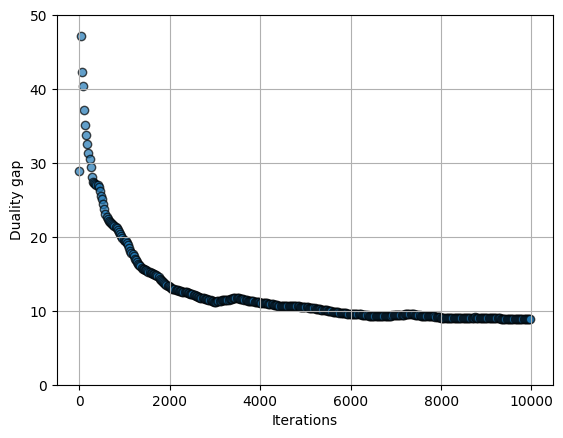

In [16]:
alpha = 0.1
T = 10000

solver_smd = SolverSMD(gridworld, c_hat, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T)
c, u, mu = solver_smd.solve_expected(N, graphics=True, graphics_gap=True)

policy_e = gridworld.mdp_forward.get_policy_from_mu(mu)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

plt.plot(solver_smd.c_iter)
plt.plot(solver_smd.u_iter)
plt.plot(solver_smd.mu_iter)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['c', 'u', 'mu'])
plt.show()

plt.scatter(solver_smd.gaps_index, solver_smd.gaps, alpha=0.7, edgecolor='k')
plt.ylim((0, 50))
plt.xlabel('Iterations')
plt.ylabel('Duality gap')
plt.grid()
plt.show()

Simulation 1/20
Simulation 2/20
Simulation 3/20
Simulation 4/20
Simulation 5/20
Simulation 6/20
Simulation 7/20
Simulation 8/20
Simulation 9/20
Simulation 10/20
Simulation 11/20
Simulation 12/20
Simulation 13/20
Simulation 14/20
Simulation 15/20
Simulation 16/20
Simulation 17/20
Simulation 18/20
Simulation 19/20
Simulation 20/20


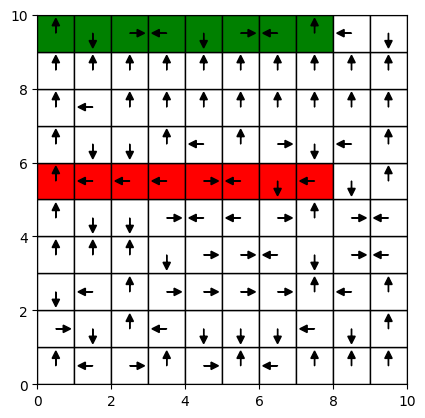

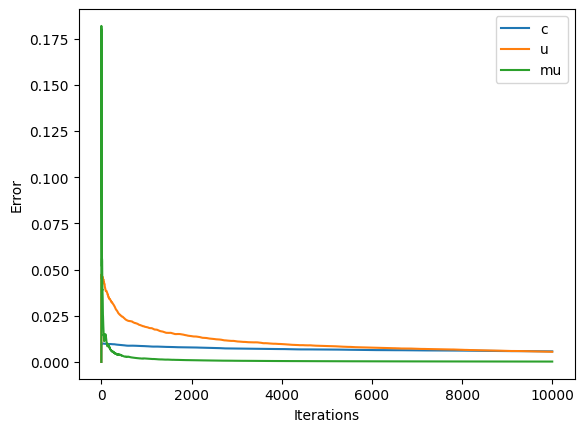

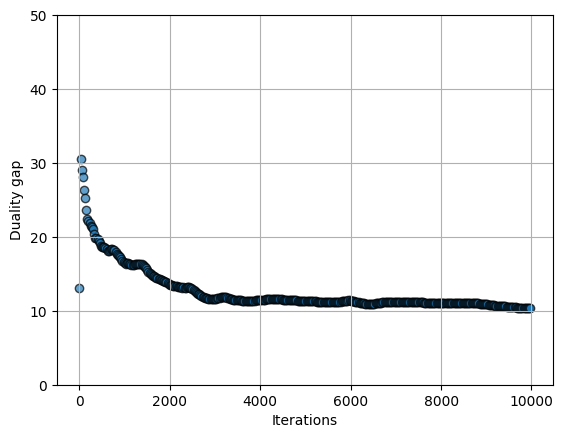

In [17]:
alpha = 0
T = 10000

solver_smd = SolverSMD(gridworld, c_hat, alpha, mu_e, c_0, u_0, mu_0, 1e-2, 1e-2, T)
c, u, mu = solver_smd.solve_expected(N, graphics=True, graphics_gap=True)

policy_e = gridworld.mdp_forward.get_policy_from_mu(mu)
visualize_policy = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        visualize_policy[i,j] = np.argmax(policy_e[gridworld.grid_to_S[i, j]])

plot_policy(grid, visualize_policy, obstacles, goal)

plt.plot(solver_smd.c_iter)
plt.plot(solver_smd.u_iter)
plt.plot(solver_smd.mu_iter)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.legend(['c', 'u', 'mu'])
plt.show()

plt.scatter(solver_smd.gaps_index, solver_smd.gaps, alpha=0.7, edgecolor='k')
plt.ylim((0, 50))
plt.xlabel('Iterations')
plt.ylabel('Duality gap')
plt.grid()
plt.show()